# Data Visualization
Canada immigration data kita ambil dari https://github.com/stefkwan-h8/dataset/blob/main/Canada.xlsx 

di file excel ini ada 3 sheets, kita akan ambil sheet "Canada by Citizenship"

kita akan bandingkan data jumlah imigran yang masuk ke Canada dari negara lain. lalu kita buat perbandingan secara visual.

## Import Data
gunakan pandas untuk import data excel ke python notebook

## Data Cleaning
rapikan data, kita siapkan sebelum kita buat jadi visual

## Visualization
trends:
- line plot
- area plot
- bar chart

perbandingan %:
- pie chart

korelasi antara dua set data:
- scatter plot

melihat tengah dan penyebaran data:
- boxplot

distribusi frekuensi:
- histogram

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

mpl.style.use(["ggplot"])

In [6]:
# import data
df_can = pd.read_excel("https://github.com/stefkwan-h8/dataset/blob/main/Canada.xlsx?raw=true", 
                       sheet_name="Canada by Citizenship",
                       skipfooter=2,
                       skiprows=20)

df_can

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Immigrants,Foreigners,Viet Nam,935,Asia,920,South-Eastern Asia,902,Developing regions,1191,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Immigrants,Foreigners,Western Sahara,903,Africa,912,Northern Africa,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,...,124,161,140,122,133,128,211,160,174,217
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,...,56,91,77,71,64,60,102,69,46,59


In [7]:
# data cleaning

df_can_copy = df_can.copy() # buat backup biar tidak perlu import ulang jika ada kesalahan

In [8]:
df_can.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Type      195 non-null    object
 1   Coverage  195 non-null    object
 2   OdName    195 non-null    object
 3   AREA      195 non-null    int64 
 4   AreaName  195 non-null    object
 5   REG       195 non-null    int64 
 6   RegName   195 non-null    object
 7   DEV       195 non-null    int64 
 8   DevName   195 non-null    object
 9   1980      195 non-null    int64 
 10  1981      195 non-null    int64 
 11  1982      195 non-null    int64 
 12  1983      195 non-null    int64 
 13  1984      195 non-null    int64 
 14  1985      195 non-null    int64 
 15  1986      195 non-null    int64 
 16  1987      195 non-null    int64 
 17  1988      195 non-null    int64 
 18  1989      195 non-null    int64 
 19  1990      195 non-null    int64 
 20  1991      195 non-null    int64 
 21  1992      195 no

In [9]:
# drop kolom tidak terpakai

df_can.columns

Index([    'Type', 'Coverage',   'OdName',     'AREA', 'AreaName',      'REG',
        'RegName',      'DEV',  'DevName',       1980,       1981,       1982,
             1983,       1984,       1985,       1986,       1987,       1988,
             1989,       1990,       1991,       1992,       1993,       1994,
             1995,       1996,       1997,       1998,       1999,       2000,
             2001,       2002,       2003,       2004,       2005,       2006,
             2007,       2008,       2009,       2010,       2011,       2012,
             2013],
      dtype='object')

In [12]:
df_can = df_can.drop(columns=['Type', 'Coverage',   'AREA', 'REG', 'DEV'])

# df_can.drop(columns=['Type', 'Coverage',   'AREA', 'REG', 'DEV'], inplace=True)

In [15]:
df_can.head(1)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004


In [16]:
# ganti nama kolom
df_can = df_can.rename(columns={"OdName":"Country", "AreaName":"Continent", "RegName":"Region", "DevName":"Dev"})

df_can

,Country,Continent,Region,Dev,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Viet Nam,Asia,South-Eastern Asia,Developing regions,1191,1829,2162,3404,7583,5907,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
192,Yemen,Asia,Western Asia,Developing regions,1,2,1,6,0,18,...,124,161,140,122,133,128,211,160,174,217
193,Zambia,Africa,Eastern Africa,Developing regions,11,17,11,7,16,9,...,56,91,77,71,64,60,102,69,46,59


In [18]:
# set kolom nama negara (value unik semua) menjadi index
df_can = df_can.set_index("Country")

df_can.head(3)

,Continent,Region,Dev,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331


In [19]:
# ambil data 1 negara skr bisa langsung dari namanya
df_can.index

Index(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       ...
       'United States of America', 'Uruguay', 'Uzbekistan', 'Vanuatu',
       'Venezuela (Bolivarian Republic of)', 'Viet Nam', 'Western Sahara',
       'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Country', length=195)

In [21]:
df_can.loc[["Indonesia"]]

,Continent,Region,Dev,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Indonesia,Asia,South-Eastern Asia,Developing regions,186,178,252,115,123,100,127,...,552,632,613,657,661,504,712,390,395,387


In [22]:
# siapin variable untuk semua kolom tahun biar mempermudah ambil kolom2 yg tahun saja

years = range(1980, 2014)

In [23]:
# ambil data Indonesia 1980-2013
df_can.loc[["Indonesia"], years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Indonesia,186,178,252,115,123,100,127,213,270,260,...,552,632,613,657,661,504,712,390,395,387


# Data Visualization
1. melihat trend dengan:
  - line plot
  - bar chart
  - area plot

In [24]:
# melihat trend jumlah imigran Indonesia yang pergi ke Canada

df_indo = df_can.loc[["Indonesia"], years]
df_indo

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Indonesia,186,178,252,115,123,100,127,213,270,260,...,552,632,613,657,661,504,712,390,395,387


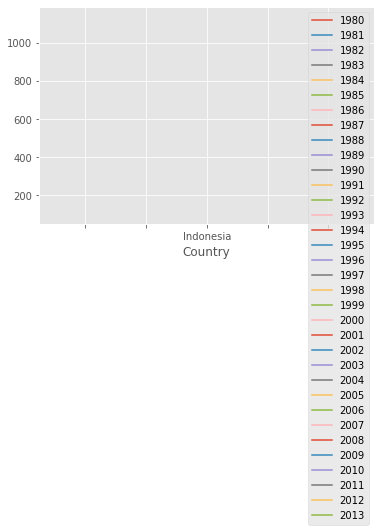

In [25]:
df_indo.plot()

In [26]:
df_indo.T

Country,Indonesia
1980,186
1981,178
1982,252
1983,115
1984,123
1985,100
1986,127
1987,213
1988,270
1989,260


di line plot, 1 kolom data = 1 garis

In [27]:
df_indo = df_indo.T

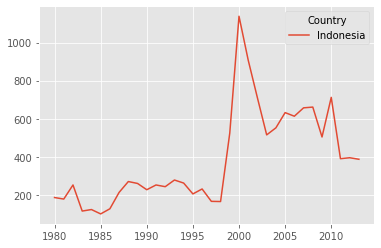

In [28]:
df_indo.plot()

Text(0, 0.5, 'Jumlah Imigran')

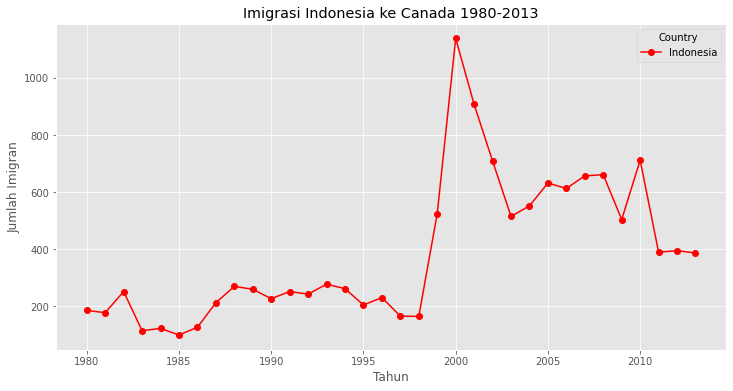

In [29]:
# mark plot menggunakan matplotlib pyplot

df_indo.plot(figsize=(12,6), marker="o", color="red")

plt.title("Imigrasi Indonesia ke Canada 1980-2013")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Imigran")

Text(1998.5, 200, 'kerusuhan mei 1998')

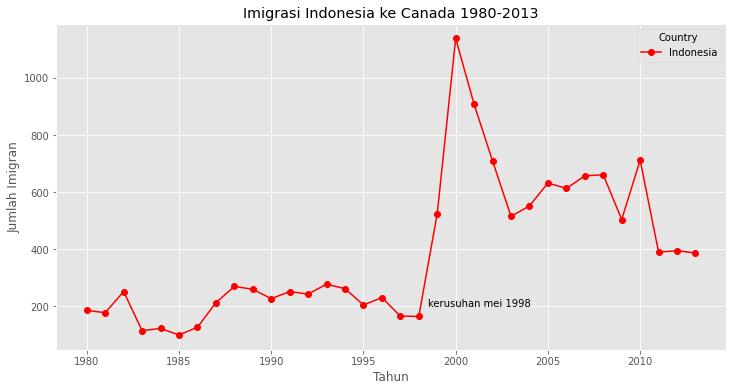

In [36]:
df_indo.plot(figsize=(12,6), marker="o", color="red")

plt.title("Imigrasi Indonesia ke Canada 1980-2013")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Imigran")

plt.text(1998.5, 200, "kerusuhan mei 1998")

analisa dari visual diatas - terlihat kalau trend jumlah imigran Indonesia ke Canada dari 1980-1998 ada di sekitar 200 orang per tahun, kemudian naik tiba tiba selama 2 tahun puncaknya di tahun 2000 sebanayak lebih dari 1000 imigran. setelah itu jumlah imigran pelan pelan turun sampai di sekitar 300an per tahun di 2013

In [37]:
# membandingkan bbrp set data
# beberapa kolom data
# contoh: jumlah imigran China dan India ke Canada

df_can.loc[["China", "India"], years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087


In [38]:
df_china_india = df_can.loc[["China", "India"], years].T

df_china_india.head(5)

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


Text(0, 0.5, 'Jumlah Imigran')

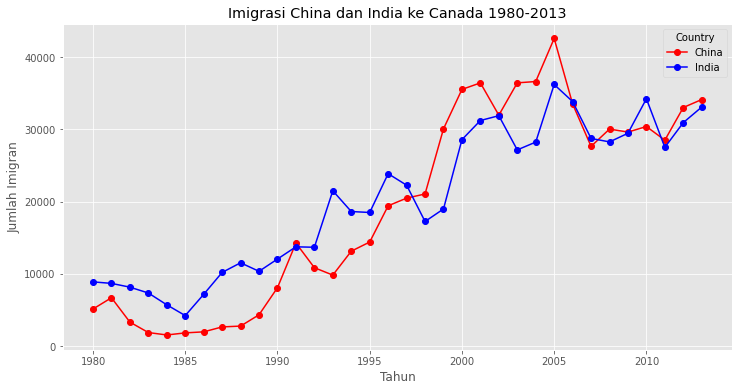

In [40]:
df_china_india.plot(figsize=(12,6), marker="o", color=["red", "blue"])

plt.title("Imigrasi China dan India ke Canada 1980-2013")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Imigran")

dari grafik diatas, sepertinya jumlah imigran China dan India yang masuk ke Canada dari 1980-2013 pelan2 bertambah. terlihat juga ada korelasi antara jumlah imigran China dan India.

Text(0, 0.5, 'Jumlah Imigran')

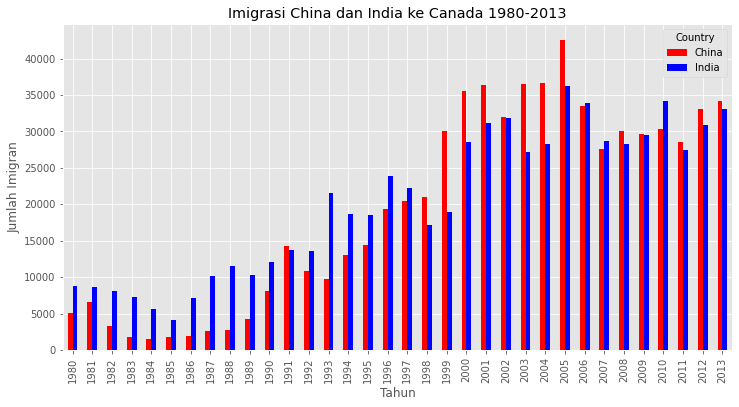

In [41]:
# Bar Chart

df_china_india.plot(kind="bar", figsize=(12,6), color=["red", "blue"])

plt.title("Imigrasi China dan India ke Canada 1980-2013")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Imigran")

Text(0.5, 0, 'Jumlah Imigran')

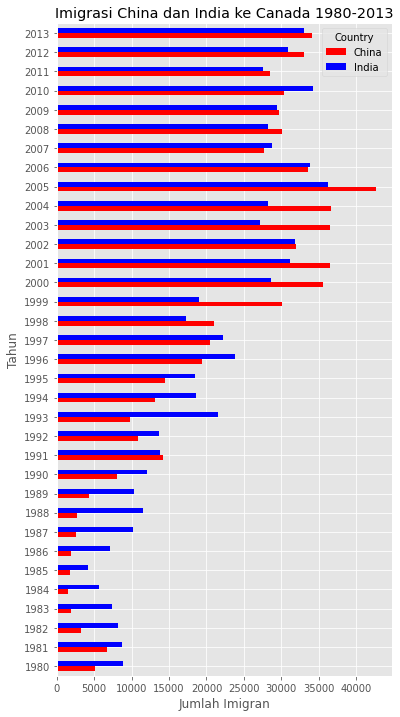

In [48]:
# Bar Chart Horizontal
df_china_india.plot(kind="barh", figsize=(6,12), color=["red", "blue"])

plt.title("Imigrasi China dan India ke Canada 1980-2013")
plt.ylabel("Tahun")
plt.xlabel("Jumlah Imigran")

bar chart ini menunjukkan trend yang sama seperti yang ditunjukkan line plot sebelumnya

Text(0, 0.5, 'Jumlah Imigran')

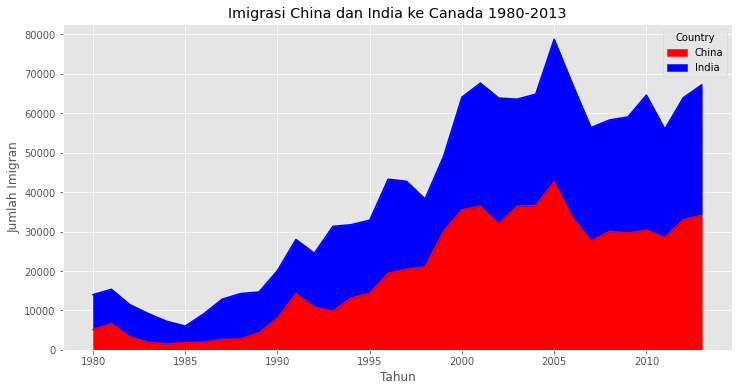

In [42]:
# area plot

df_china_india.plot(kind="area", figsize=(12,6), color=["red", "blue"])

plt.title("Imigrasi China dan India ke Canada 1980-2013")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Imigran")

area plot secara default menambahkan total dari data yang di plot. jadi di tahun 2005, total imgiran China + India mencapai hampir 80000 orang.

Text(0, 0.5, 'Jumlah Imigran')

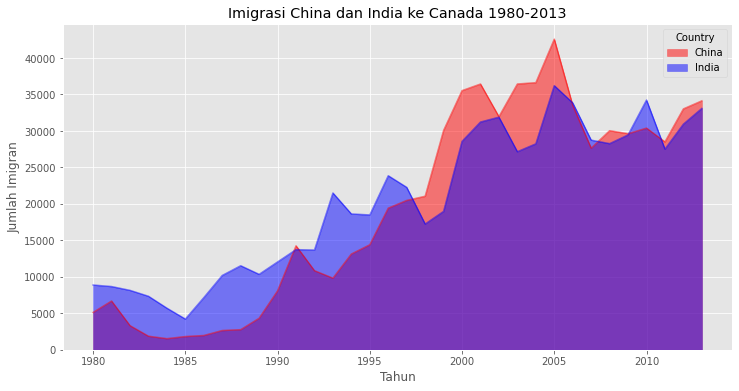

In [43]:
df_china_india.plot(kind="area", figsize=(12,6), color=["red", "blue"], stacked=False)

plt.title("Imigrasi China dan India ke Canada 1980-2013")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Imigran")

dengan tambahan opsi stacked=False di sebuah area plot, data tidak lagi dijumlahkan. Datanya ditumpuk di axis z, depan belakang.

Text(0, 0.5, 'Jumlah Imigran')

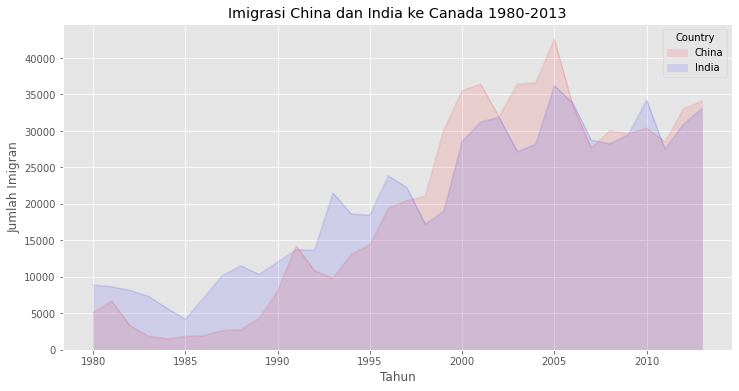

In [46]:
# ketipisan warna bisa kita edit

df_china_india.plot(kind="area", figsize=(12,6), color=["red", "blue"], stacked=False, alpha=0.1)

plt.title("Imigrasi China dan India ke Canada 1980-2013")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Imigran")

# Case Study
Dicoba: ambil data 2 negara dan buat line plot, bar chart, area plot.

In [51]:
# for c in df_can.index:
#   print(c)

# Pie Chart
pie chart digunakan untuk membandingkan proporsi (persentase) beberapa titik data saja. bukan beberapa set data seperti line, bar, area plot.

misal A punya 5 kelereng, B punya 10 kereng maka dari total 15 kelereng A punya 5/15, B punya 10/15 --> visual dengan pie chart

In [52]:
# contoh: jumlah imigran Indonesia vs Singapore di tahun 2000

df_can.loc[["Indonesia", "Singapore"], 2000]

Country
Indonesia    1138
Singapore     444
Name: 2000, dtype: int64

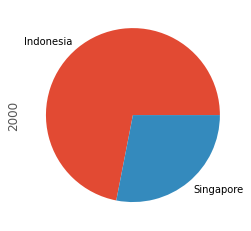

In [53]:
df_can.loc[["Indonesia", "Singapore"], 2000].plot(kind="pie")

In [54]:
# dari negara ASEAN, di tahun 2008, negara mana yang paling banyak mengirim imigran ke Canada?

df_can.head()

,Continent,Region,Dev,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


In [55]:
df_can["Region"].unique()

array(['Southern Asia', 'Southern Europe', 'Northern Africa', 'Polynesia',
       'Middle Africa', 'Caribbean', 'South America', 'Western Asia',
       'Australia and New Zealand', 'Western Europe', 'Eastern Europe',
       'Central America', 'Western Africa', 'Southern Africa',
       'South-Eastern Asia', 'Eastern Africa', 'Northern America',
       'Eastern Asia', 'Northern Europe', 'Melanesia', 'Central Asia',
       'Micronesia'], dtype=object)

In [57]:
# ambil negara2 khusus di Region "South-Eastern Asia"
df_asean = df_can[df_can["Region"] == "South-Eastern Asia"]
df_asean

,Continent,Region,Dev,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Brunei Darussalam,Asia,South-Eastern Asia,Developing regions,79,6,8,2,2,4,12,...,3,4,5,11,10,5,12,6,3,6
Cambodia,Asia,South-Eastern Asia,Developing regions,12,19,26,33,10,7,8,...,348,370,529,460,354,203,200,196,233,288
Indonesia,Asia,South-Eastern Asia,Developing regions,186,178,252,115,123,100,127,...,552,632,613,657,661,504,712,390,395,387
Lao People's Democratic Republic,Asia,South-Eastern Asia,Developing regions,11,6,16,16,7,17,21,...,38,42,74,53,32,39,54,22,25,15
Malaysia,Asia,South-Eastern Asia,Developing regions,786,816,813,448,384,374,425,...,401,593,580,600,658,640,802,409,358,204
Myanmar,Asia,South-Eastern Asia,Developing regions,80,62,46,31,41,23,18,...,191,210,953,1887,975,1153,556,368,193,262
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,14004,18139,18400,19837,24887,28573,38617,36765,34315,29544
Singapore,Asia,South-Eastern Asia,Developing regions,241,301,337,169,128,139,205,...,311,392,298,690,734,366,805,219,146,141
Thailand,Asia,South-Eastern Asia,Developing regions,56,53,113,65,82,66,78,...,392,575,500,487,519,512,499,396,296,400


In [58]:
# dari negara ASEAN, di tahun 2008, negara mana yang paling banyak mengirim imigran ke Canada?
# proporsi masing2 negara ASEAN lainnya seperti apa?

df_asean[2008]

Country
Brunei Darussalam                      10
Cambodia                              354
Indonesia                             661
Lao People's Democratic Republic       32
Malaysia                              658
Myanmar                               975
Philippines                         24887
Singapore                             734
Thailand                              519
Viet Nam                             1784
Name: 2008, dtype: int64

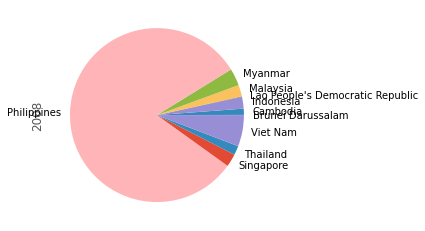

In [59]:
df_asean[2008].plot(kind="pie")

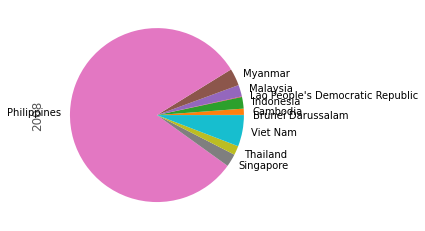

In [60]:
df_asean[2008].plot(kind="pie", 
                    colors=["tab:blue",
                            "tab:orange",
                            "tab:green",
                            "tab:red",
                            "tab:purple",
                            "tab:brown",
                            "tab:pink",
                            "tab:gray",
                            "tab:olive",
                            "tab:cyan"])

Text(0.5, 1.0, 'total imigran dari negara ASEAN di tahun 2008 ke Canada')

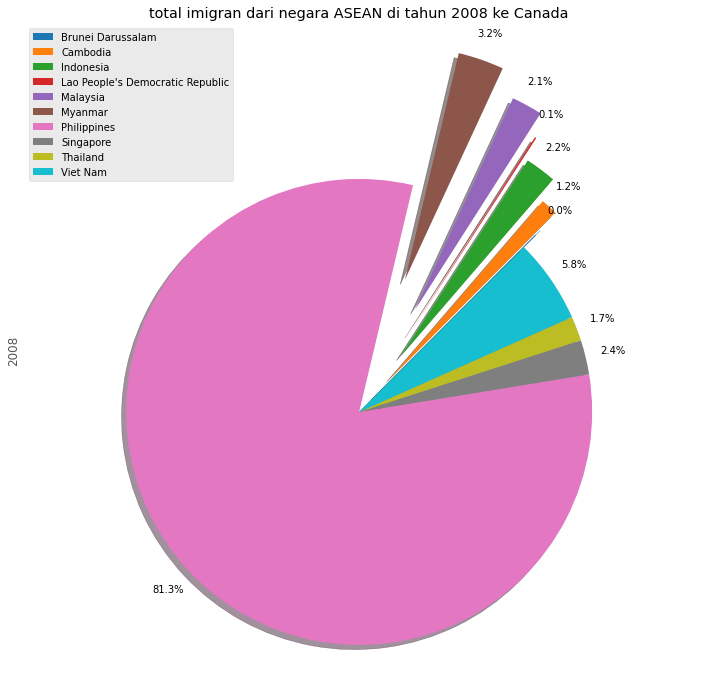

In [86]:
df_asean[2008].plot(kind="pie", 
                    figsize=(12,12),
                    colors=["tab:blue",
                            "tab:orange",
                            "tab:green",
                            "tab:red",
                            "tab:purple",
                            "tab:brown",
                            "tab:pink",
                            "tab:gray",
                            "tab:olive",
                            "tab:cyan"],
                    explode=[0.1,0.2,0.3,0.4,0.5,0.6,0,0,0,0], 
                    labels=None,
                    # labels=["Brunei", "Cambodia", "Indonesia", "Laos", "Malaysia", "Myanmar", "Phillipines", "Singapore", "Thailand", "Vietnam"], 
                    autopct='%1.1f%%',
                    pctdistance=1.12,
                    shadow=True, 
                    startangle=45)

plt.axis("equal")

plt.legend(df_asean.index)

plt.title("total imigran dari negara ASEAN di tahun 2008 ke Canada")

In [89]:
# buat kolom total untuk total imigran 2008-2013

df_asean["Total"] = df_asean[years].sum(axis=1)
df_asean.head(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Continent,Region,Dev,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Brunei Darussalam,Asia,South-Eastern Asia,Developing regions,79,6,8,2,2,4,12,...,4,5,11,10,5,12,6,3,6,600
Cambodia,Asia,South-Eastern Asia,Developing regions,12,19,26,33,10,7,8,...,370,529,460,354,203,200,196,233,288,6538
Indonesia,Asia,South-Eastern Asia,Developing regions,186,178,252,115,123,100,127,...,632,613,657,661,504,712,390,395,387,13150


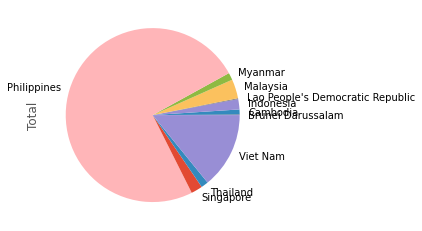

In [90]:
df_asean["Total"].plot(kind="pie")

Text(0, 0.5, '')

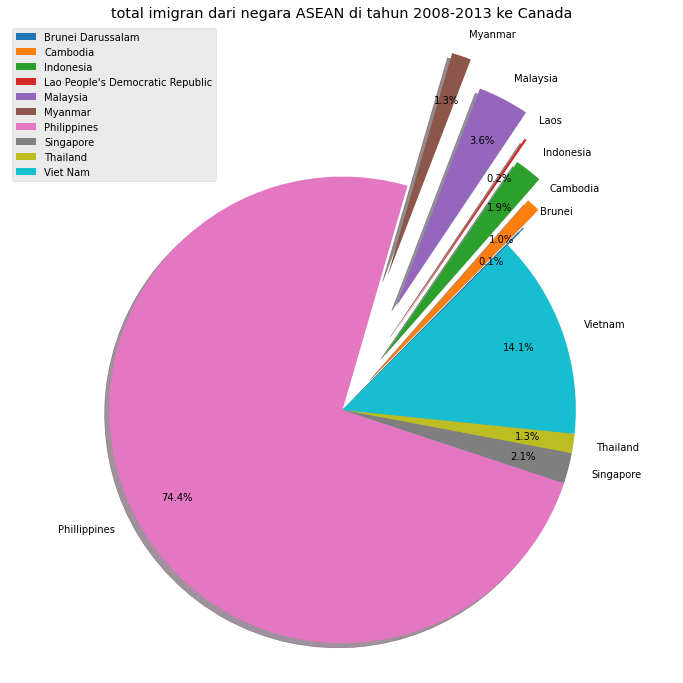

In [97]:
df_asean["Total"].plot(kind="pie", 
                    figsize=(12,12),
                    colors=["tab:blue",
                            "tab:orange",
                            "tab:green",
                            "tab:red",
                            "tab:purple",
                            "tab:brown",
                            "tab:pink",
                            "tab:gray",
                            "tab:olive",
                            "tab:cyan"],
                    explode=[0.1,0.2,0.3,0.4,0.5,0.6,0,0,0,0], 
                    # labels=None,
                    labels=["Brunei", "Cambodia", "Indonesia", "Laos", "Malaysia", "Myanmar", "Phillippines", "Singapore", "Thailand", "Vietnam"], 
                    autopct='%1.1f%%',
                    pctdistance=0.8,
                    shadow=True, 
                    startangle=45)

plt.axis("equal")

plt.legend(df_asean.index)

plt.title("total imigran dari negara ASEAN di tahun 2008-2013 ke Canada")
plt.ylabel("")

dari negara2 ASEAN yang paling banyak mengirim imigran ke Canada adalah Philippines, 74.4% dari seluruh imgigran ASEAN berasal dari Philippines.

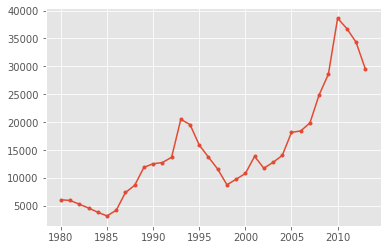

In [99]:
# kita bisa lihat trend Philippines

df_can.loc["Philippines", years].plot(marker=".")

# Scatter Plot
plot yang digunakan untuk melihat korelasi antara dua set data

In [101]:
df_china_india.head()

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


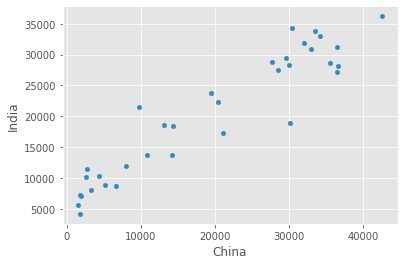

In [103]:
df_china_india.plot(kind="scatter", x="China", y="India")

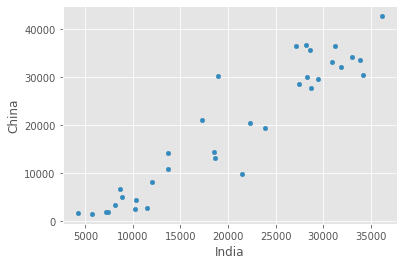

In [104]:
df_china_india.plot(kind="scatter", x="India", y="China")

dari scatter plot jumlah imigran per tahun 2008-2013 ke Canada dari negara China (y-axis) dan India (x-axis), kita bisa melihat adanya korelasi positif antara kedua set data ini. semakin banyak imigran China, semakin banyak pula imigran India.

In [107]:
# bandingin korelasi tahun dan jumlah imigran China
df_china_india.head()

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


In [110]:
df_china_india2 = df_china_india.reset_index()
df_china_india2.head()

Country,index,China,India
0,1980,5123,8880
1,1981,6682,8670
2,1982,3308,8147
3,1983,1863,7338
4,1984,1527,5704


In [113]:
df_china_india2.rename(columns={"index":"year"}, inplace=True)

In [114]:
df_china_india2.head()

Country,year,China,India
0,1980,5123,8880
1,1981,6682,8670
2,1982,3308,8147
3,1983,1863,7338
4,1984,1527,5704


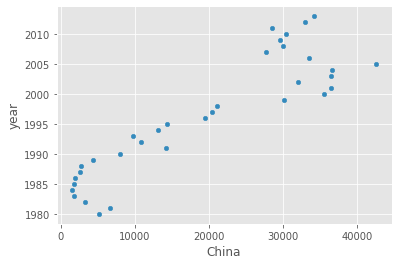

In [115]:
df_china_india2.plot(kind="scatter", x="China", y="year")

In [116]:
# jumlah imigran Indonesia dan Japan ke Canada

df_indojp = df_can.loc[["Indonesia", "Japan"], years].T
df_indojp.head()

Country,Indonesia,Japan
1980,186,701
1981,178,756
1982,252,598
1983,115,309
1984,123,246


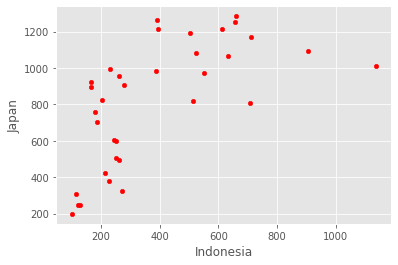

In [118]:
df_indojp.plot(kind="scatter", x="Indonesia", y="Japan", color="red")

kelihatannya ada sedikit korelasi antara jumlah imigran dari Indonesia dan Japan

# Box Plot
melihat "tengah" dan "penyebaran" data. melihat 5 angka statistik:
- Quartile 1 - titik 25%
- Quartile 2 / median / titik tengah data
- Quartile 3 - titik 75%
- min dan max terhitung dari jarak inter-quartile range 


misal, berat badan murid kelas A adalah 45, 60, 70, 80 maka median ada di (60+70)/2 = 65

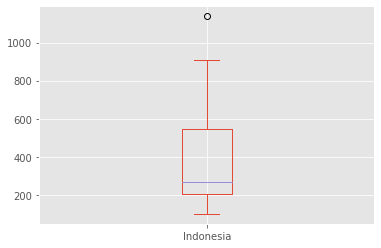

In [119]:
df_indo.plot(kind="box")

dari visual box plot diatas, kita bisa lihat kalau ada 1 data luar biasa di atas 1000 imigran pergi ke Canada dalam 1 tahun. tahun-tahun lainnya kebanyakan ada di antara 207-545, dan setengah dari semua data yang kita punya ada di bawah 266 (garis median yang ungu).

In [120]:
df_indo.describe()

Country,Indonesia
count,34.000000
mean,386.764706
std,251.233449
min,100.000000
25%,207.000000
50%,266.000000
75%,545.250000
max,1138.000000


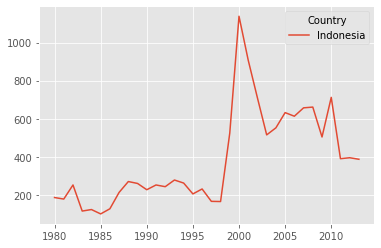

In [121]:
df_indo.plot()

lanjut dengan box plot, kita bisa bandingkan bbrp box plot sekaligus

In [123]:
# bandingin China, India, Indonesia, Japan

df_ciij = df_can.loc[["China", "India", "Indonesia", "Japan"], years].T
df_ciij.head()

Country,China,India,Indonesia,Japan
1980,5123,8880,186,701
1981,6682,8670,178,756
1982,3308,8147,252,598
1983,1863,7338,115,309
1984,1527,5704,123,246


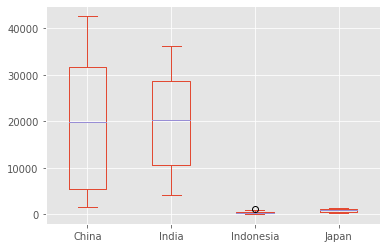

In [124]:
df_ciij.plot(kind="box")

karena Indonesia dan Japan jumlah imigran berbeda jauh dengan China dan India, jadi tidak terlihat, kita bisa pisahin, kita bisa juga pakai box plot horizontal

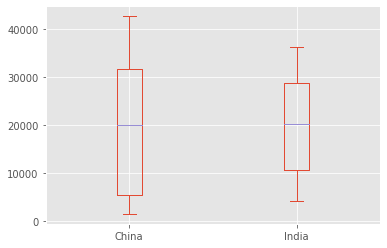

In [125]:
df_ciij[["China", "India"]].plot(kind="box")

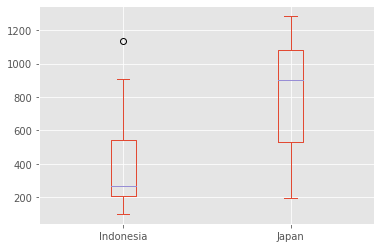

In [126]:
df_ciij[["Indonesia", "Japan"]].plot(kind="box")

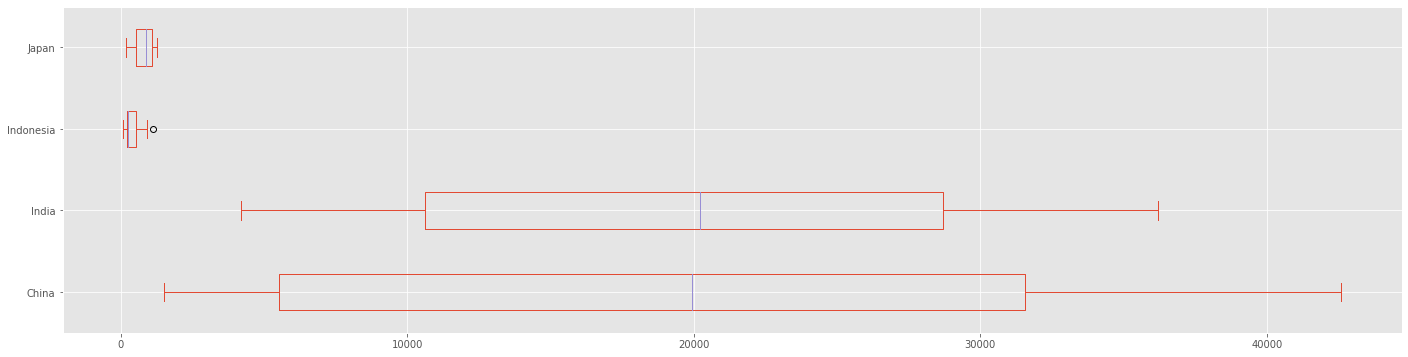

In [129]:
# horizontal box plot
df_ciij.plot(kind="box", vert=False, figsize=(24,6))

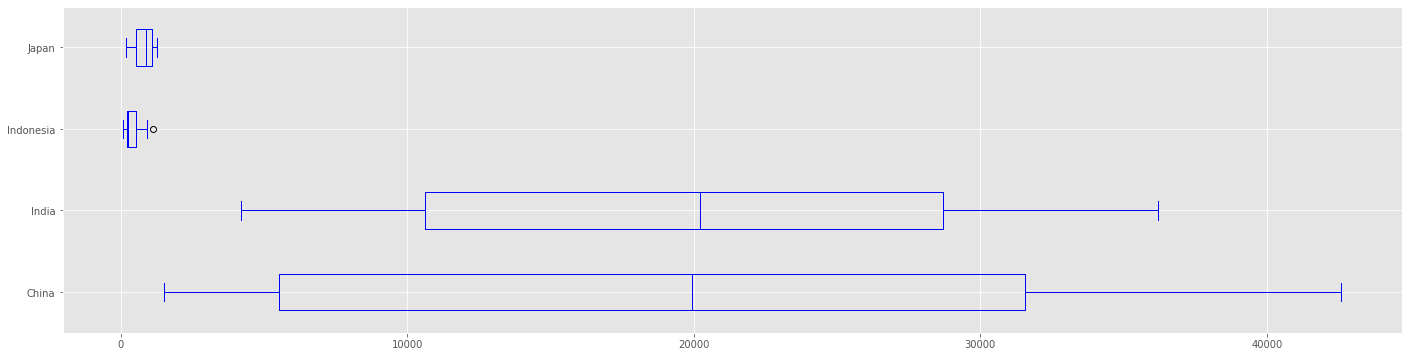

In [130]:
df_ciij.plot(kind="box", vert=False, figsize=(24,6), color="blue")



- line plot
- bar chart
- area plot

- pie chart

- scatter plot

- box plot

- histogram, frekuensi distribusi

distribusi data, frekuensi distribusi data. misalkan ada data nilai game tembak2an, [10, 15, 78, 2, 100, 56, 89, 45 ] --> kita kumpulkan semua nilai2 ini dan masukin ke "bin" tertentu. kita hitung setiap "bin" punya berapa count (berapa titik data).

"bin" ada 10:
1.  0-10     11
2.  10-20    1
3.  20-30
4.  30-40
5.  40-50    1
6.  50-60    1
7.  60-70
8.  70-80    1
9.  80-90    1
10. 90-100   1

misalkan di data lain
"bin" ada 10:
1.  0-10     111111111111111
2.  10-20    11111
3.  20-30
4.  30-40
5.  40-50    111
6.  50-60    11
7.  60-70
8.  70-80    1111111
9.  80-90    111
10. 90-100   1111111111




In [131]:
df_indo.head()

Country,Indonesia
1980,186
1981,178
1982,252
1983,115
1984,123


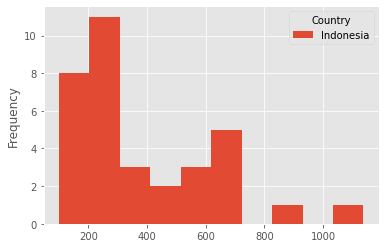

In [132]:
df_indo.plot(kind="hist")

kalau kita buat histogram (frekuensi distribusi data per bin) dari pandas dataframe, hasil visual plot nya, pembatas bin dan penanda x-axis tidak pas. kita perlu step tambahan untuk membuat penanda x-axis pas dengan pembatas bin

In [133]:
np.histogram(df_indo)

(array([ 8, 11,  3,  2,  3,  5,  0,  1,  0,  1]),
 array([ 100. ,  203.8,  307.6,  411.4,  515.2,  619. ,  722.8,  826.6,
         930.4, 1034.2, 1138. ]))

numpy.histogram(data) memberikan kita 2 array. array pertama frekuensi. array kedua adalah pembatas bin nya.

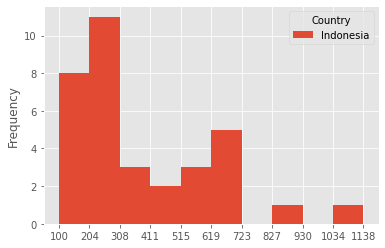

In [135]:
freq, pembatas_bin = np.histogram(df_indo)

df_indo.plot(kind="hist", xticks = pembatas_bin)

Text(0.5, 0, 'bin jumlah imigran Indonesia')

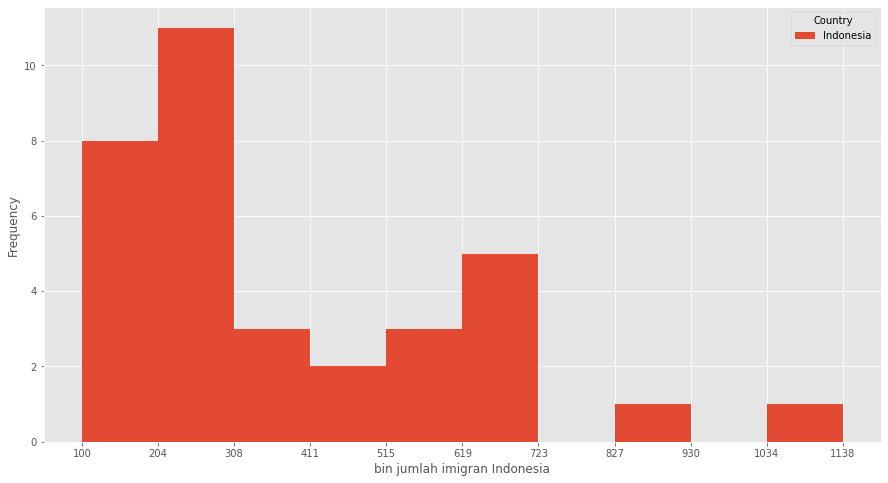

In [137]:
# tambah opsi figsize

freq, pembatas_bin = np.histogram(df_indo)

df_indo.plot(kind="hist", xticks = pembatas_bin, figsize=(15,8))

plt.xlabel("bin jumlah imigran Indonesia")

antara 100-204 orang Indonesia berimigrasi ke Canada dalam 1 tahun --> terjadi 8 kali dari seluruh data kita (34 tahun 1980-2013)

Text(0.5, 0, 'bin jumlah imigran Indonesia')

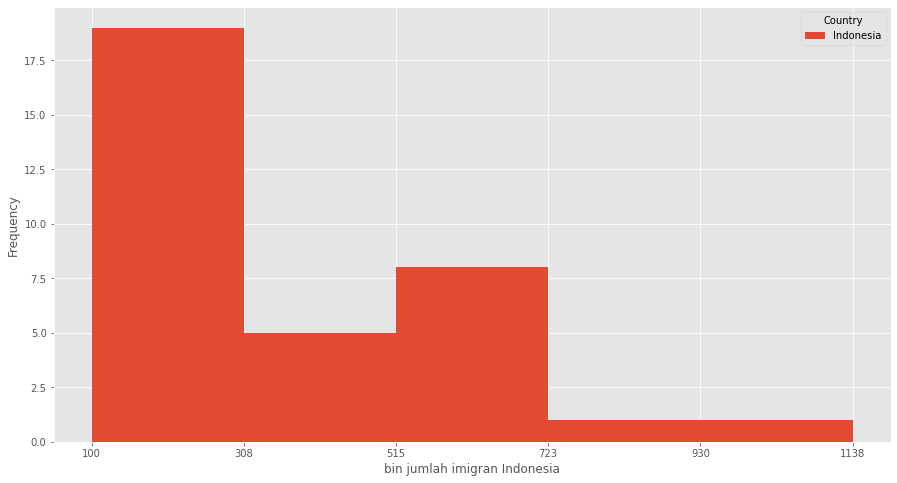

In [139]:
# jumlah bin bisa kita custom

jumlah_bin = 5

freq, pembatas_bin = np.histogram(df_indo, bins=jumlah_bin)

df_indo.plot(kind="hist", xticks = pembatas_bin, figsize=(15,8), bins=jumlah_bin)

plt.xlabel("bin jumlah imigran Indonesia")